<h2> Load the Dependencies </h2>

In [1]:
from cosipy.response import FullDetectorResponse
from cosipy.spacecraftfile.SpacecraftFile import SpacecraftFile
#from cosipy.ts_map.TSMap import TSMap
from cosipy import BinnedData

from histpy import Histogram, HealpixAxis, Axis
from mhealpy import HealpixMap, HealpixBase
import healpy as hp

from astromodels import *
from astromodels.utils.angular_distance import angular_distance
from past.utils import old_div
#from threeML import *

import astropy.units as u
#from astropy.units import Quantity
from astropy.time import Time
from astropy.coordinates import SkyCoord
from scoords import SpacecraftFrame, Attitude

import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm

import copy
import os 

/Users/field/opt/miniconda3/envs/cosipy/lib/python3.9/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)


18:20:29 WARNING   We have set the min_value of K to 1e-99 because there was a postive transform   ]8;id=142073;file:///Users/field/opt/miniconda3/envs/cosipy/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=45080;file:///Users/field/opt/miniconda3/envs/cosipy/lib/python3.9/site-packages/astromodels/core/parameter.py#704\704]8;;\

         WARNING   We have set the min_value of K to 1e-99 because there was a postive transform   ]8;id=831172;file:///Users/field/opt/miniconda3/envs/cosipy/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=105250;file:///Users/field/opt/miniconda3/envs/cosipy/lib/python3.9/site-packages/astromodels/core/parameter.py#704\704]8;;\

         WARNING   We have set the min_value of K to 1e-99 because there was a postive transform   ]8;id=786975;file:///Users/field/opt/miniconda3/envs/cosipy/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=197043;file:///Users/field/opt/miniconda3/envs/cosipy/lib/python3.9/site-packages/astromodels/core/parameter.py#704\704]8;;\

         WARNING   We have set the min_value of K to 1e-99 because there was a postive transform   ]8;id=425430;file:///Users/field/opt/miniconda3/envs/cosipy/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=817571;file:///Users/field/opt/miniconda3/envs/cosipy/lib/python3.9/site-packages/astromodels/core/parameter.py#704\704]8;;\

         WARNING   We have set the min_value of F to 1e-99 because there was a postive transform   ]8;id=99222;file:///Users/field/opt/miniconda3/envs/cosipy/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=709609;file:///Users/field/opt/miniconda3/envs/cosipy/lib/python3.9/site-packages/astromodels/core/parameter.py#704\704]8;;\

         WARNING   We have set the min_value of K to 1e-99 because there was a postive transform   ]8;id=723266;file:///Users/field/opt/miniconda3/envs/cosipy/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=538134;file:///Users/field/opt/miniconda3/envs/cosipy/lib/python3.9/site-packages/astromodels/core/parameter.py#704\704]8;;\

/Users/field/opt/miniconda3/envs/cosipy/lib/python3.9/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)


18:20:29 INFO      Starting 3ML!                                                                     ]8;id=436510;file:///Users/field/opt/miniconda3/envs/cosipy/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=638609;file:///Users/field/opt/miniconda3/envs/cosipy/lib/python3.9/site-packages/threeML/__init__.py#35\35]8;;\

         WARNING   WARNINGs here are NOT errors                                                      ]8;id=544723;file:///Users/field/opt/miniconda3/envs/cosipy/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=532002;file:///Users/field/opt/miniconda3/envs/cosipy/lib/python3.9/site-packages/threeML/__init__.py#36\36]8;;\

         WARNING   but are inform you about optional packages that can be installed                  ]8;id=747329;file:///Users/field/opt/miniconda3/envs/cosipy/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=902606;file:///Users/field/opt/miniconda3/envs/cosipy/lib/python3.9/site-packages/threeML/__init__.py#37\37]8;;\

         WARNING    to disable these messages, turn off start_warning in your config file            ]8;id=210087;file:///Users/field/opt/miniconda3/envs/cosipy/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=740886;file:///Users/field/opt/miniconda3/envs/cosipy/lib/python3.9/site-packages/threeML/__init__.py#40\40]8;;\

         WARNING   ROOT minimizer not available                                                ]8;id=782372;file:///Users/field/opt/miniconda3/envs/cosipy/lib/python3.9/site-packages/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=622665;file:///Users/field/opt/miniconda3/envs/cosipy/lib/python3.9/site-packages/threeML/minimizer/minimization.py#1345\1345]8;;\

         WARNING   Multinest minimizer not available                                           ]8;id=63877;file:///Users/field/opt/miniconda3/envs/cosipy/lib/python3.9/site-packages/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=68021;file:///Users/field/opt/miniconda3/envs/cosipy/lib/python3.9/site-packages/threeML/minimizer/minimization.py#1357\1357]8;;\

         WARNING   PyGMO is not available                                                      ]8;id=989698;file:///Users/field/opt/miniconda3/envs/cosipy/lib/python3.9/site-packages/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=919200;file:///Users/field/opt/miniconda3/envs/cosipy/lib/python3.9/site-packages/threeML/minimizer/minimization.py#1369\1369]8;;\

         WARNING   The cthreeML package is not installed. You will not be able to use plugins which  ]8;id=872392;file:///Users/field/opt/miniconda3/envs/cosipy/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=293320;file:///Users/field/opt/miniconda3/envs/cosipy/lib/python3.9/site-packages/threeML/__init__.py#94\94]8;;\
                  require the C/C++ interface (currently HAWC)                                                     

18:20:30 WARNING   Could not import plugin HAWCLike.py. Do you have the relative instrument         ]8;id=639674;file:///Users/field/opt/miniconda3/envs/cosipy/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=380685;file:///Users/field/opt/miniconda3/envs/cosipy/lib/python3.9/site-packages/threeML/__init__.py#144\144]8;;\
                  software installed and configured?                                                               

         WARNING   Could not import plugin FermiLATLike.py. Do you have the relative instrument     ]8;id=71786;file:///Users/field/opt/miniconda3/envs/cosipy/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=883846;file:///Users/field/opt/miniconda3/envs/cosipy/lib/python3.9/site-packages/threeML/__init__.py#144\144]8;;\
                  software installed and configured?                                                               

18:20:30 WARNING   No fermitools installed                                              ]8;id=686318;file:///Users/field/opt/miniconda3/envs/cosipy/lib/python3.9/site-packages/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=165928;file:///Users/field/opt/miniconda3/envs/cosipy/lib/python3.9/site-packages/threeML/utils/data_builders/fermi/lat_transient_builder.py#44\44]8;;\

         WARNING   Env. variable OMP_NUM_THREADS is not set. Please set it to 1 for optimal         ]8;id=168759;file:///Users/field/opt/miniconda3/envs/cosipy/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=9964;file:///Users/field/opt/miniconda3/envs/cosipy/lib/python3.9/site-packages/threeML/__init__.py#387\387]8;;\
                  performances in 3ML                                                                              

         WARNING   Env. variable MKL_NUM_THREADS is not set. Please set it to 1 for optimal         ]8;id=813641;file:///Users/field/opt/miniconda3/envs/cosipy/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=500915;file:///Users/field/opt/miniconda3/envs/cosipy/lib/python3.9/site-packages/threeML/__init__.py#387\387]8;;\
                  performances in 3ML                                                                              

         WARNING   Env. variable NUMEXPR_NUM_THREADS is not set. Please set it to 1 for optimal     ]8;id=993449;file:///Users/field/opt/miniconda3/envs/cosipy/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=961782;file:///Users/field/opt/miniconda3/envs/cosipy/lib/python3.9/site-packages/threeML/__init__.py#387\387]8;;\
                  performances in 3ML                                                                              

<h4> <red> modify the data path for your environment...</red></h3>

In [2]:
path_data = "/Users/field/COSItools/cosipy/cosipy/test_data/DC2"

<h2> Define the Extended Source Model </h2>

In this section, we define a spatial and spectral model and combine them into an astromodels ExtendedSource object. 

Then, we put the extended source into a HealpixMap, which pixelizes the spatial component. 

<h3>New classes for COSI</h3>
First up, need to define some new classes for use in COSI. These are not already defined in astromodels. I'm putting them here for now (so everyone can look at them) but ultimately we'd presumably want to move this to a separate file within cosipy. 

Wide_Asymm_Gaussian_on_sphere is a 2D astromodels function that's basically the same as the Asymm_Gaussian_on_sphere function included with astromodels, except that the sigma of the semi-major axis can go beyond 20 degrees. Astromodels cautions that the correct way to implement such a wide gaussian on a sphere is actually using a Kent distribution, but for now my understanding is that this is correct in the sense that it matches the implementation in cosima used to generate simulated data. 

In [3]:
class Wide_Asymm_Gaussian_on_sphere(Function2D, metaclass=FunctionMeta):
    r"""
    description :

        A bidimensional Gaussian function on a sphere (in spherical coordinates)

        see https://en.wikipedia.org/wiki/Gaussian_function#Two-dimensional_Gaussian_function

    parameters :

        lon0 :

            desc : Longitude of the center of the source
            initial value : 0.0
            min : 0.0
            max : 360.0

        lat0 :

            desc : Latitude of the center of the source
            initial value : 0.0
            min : -90.0
            max : 90.0

        a :

            desc : Standard deviation of the Gaussian distribution (major axis)
            initial value : 10
            min : 0
            max : 90

        e :

            desc : Excentricity of Gaussian ellipse
            initial value : 0.9
            min : 0
            max : 1

        theta :

            desc : inclination of major axis to a line of constant latitude
            initial value : 10.
            min : -90.0
            max : 90.0

    """
    def _set_units(self, x_unit, y_unit, z_unit):

        # lon0 and lat0 and a have most probably all units of degrees. However,
        # let's set them up here just to save for the possibility of using the
        # formula with other units (although it is probably never going to happen)

        self.lon0.unit = x_unit
        self.lat0.unit = y_unit
        self.a.unit = x_unit
        self.e.unit = u.dimensionless_unscaled
        self.theta.unit = u.degree

    def evaluate(self, x, y, lon0, lat0, a, e, theta):

        lon, lat = x, y

        b = a * np.sqrt(1.0 - e**2)

        dX = np.atleast_1d(angular_distance(lon0, lat0, lon, lat0))
        dY = np.atleast_1d(angular_distance(lon0, lat0, lon0, lat))

        dlon = lon - lon0
        if isinstance(dlon, u.Quantity):
            dlon = (dlon.to(u.degree)).value

        idx = np.logical_and(
            np.logical_or(dlon < 0, dlon > 180),
            np.logical_or(dlon > -180, dlon < -360),
        )
        dX[idx] = -dX[idx]

        idx = lat < lat0
        dY[idx] = -dY[idx]

        if isinstance(theta, u.Quantity):
            phi = (theta.to(u.degree)).value + 90.0
        else:
            phi = theta + 90.0

        cos2_phi = np.power(np.cos(phi * np.pi / 180.0), 2)
        sin2_phi = np.power(np.sin(phi * np.pi / 180.0), 2)

        sin_2phi = np.sin(2.0 * phi * np.pi / 180.0)

        A = old_div(cos2_phi, (2.0 * b**2)) + old_div(sin2_phi, (2.0 * a**2))
        
        B = old_div(-sin_2phi, (4.0 * b**2)) + old_div(sin_2phi, (4.0 * a**2))

        C = old_div(sin2_phi, (2.0 * b**2)) + old_div(cos2_phi, (2.0 * a**2))

        E = -A * np.power(dX, 2) + 2.0 * B * dX * dY - C * np.power(dY, 2)

        return np.power(old_div(180, np.pi), 2) * 1.0 / (2 * np.pi * a * b) * np.exp(E)

    def get_boundaries(self):

        # Truncate the gaussian at 2 times the max of sigma allowed

        min_lat = max(-90.0, self.lat0.value - 2 * self.a.max_value)
        max_lat = min(90.0, self.lat0.value + 2 * self.a.max_value)

        max_abs_lat = max(np.absolute(min_lat), np.absolute(max_lat))

        if (
            max_abs_lat > 89.0
            or 2 * self.a.max_value / np.cos(max_abs_lat * np.pi / 180.0) >= 180.0
        ):

            min_lon = 0.0
            max_lon = 360.0

        else:

            min_lon = self.lon0.value - 2 * self.a.max_value / np.cos(
                max_abs_lat * np.pi / 180.0
            )
            max_lon = self.lon0.value + 2 * self.a.max_value / np.cos(
                max_abs_lat * np.pi / 180.0
            )

            if min_lon < 0.0:

                min_lon = min_lon + 360.0

            elif max_lon > 360.0:

                max_lon = max_lon - 360.0

        return (min_lon, max_lon), (min_lat, max_lat)

    def get_total_spatial_integral(self, z=None):
        """
        Returns the total integral (for 2D functions) or the integral over the spatial components (for 3D functions).
        needs to be implemented in subclasses.

        :return: an array of values of the integral (same dimension as z).
        """

        if isinstance(z, u.Quantity):
            z = z.value
        return np.ones_like(z)        
        

spec_from_data is a spectral model that just loads a dat file. Obviously, it could be prettier than this, but here is something that will work for our purposes for right now:

In [4]:
class SpecFromDat(Function1D, metaclass=FunctionMeta):
        r"""
        description :
            A  spectrum loaded from a dat file
        latex : a spectrum loaded from a .dat file
        parameters :
            K :
                desc : Normalization
                initial value : 1.0
                is_normalization : True
                transformation : log10
                min : 1e-30
                max : 1e3
                delta : 0.1
        properties:
            dat:
                desc: the data file to load
                initial value: test.dat
                defer: True
        """
        
        #def __init__(
        #    self,
        #name: Optional[str] = None,
        #function_definition: Optional[str] = None,
        #parameters: Optional[Dict[str, Parameter]] = None,
        #properties: Optional[Dict[str, FunctionProperty]] = None,
        #):
            #self.dataFlux = np.genfromtxt(dat,comments = "#",usecols = (2),skip_footer=1,skip_header=5)
            #self.dataEn = np.genfromtxt(dat,comments = "#",usecols = (1),skip_footer=1,skip_header=5)
            #print (self.dataEn)
            #pass
            # could do something fancy here to check that dataEn is just incrermenting by 1 keV
            # and save time later
            # but do we need to be generalizable to a .dat that is not defined for every 1 keV??

        # NOTE: I would like to get something here in init, but everything i try keeps throwing errors
        # I will return to this
        # for now, we have to load the data every time we evaluate the function... 
        # but that's probably ok since this function doesn't really need to get called a lot of times
        # see below
            
        def _set_units(self, x_unit, y_unit):
            
            self.K.unit = y_unit

        def evaluate(self, x, K): #ultimately want to add K as a normalization, done once...
            
            #try: self.dataEn[0]
            #except: 
            self.dataFlux = np.genfromtxt(self.dat.value,comments = "#",usecols = (2),skip_footer=1,skip_header=5)
            self.dataEn = np.genfromtxt(self.dat.value,comments = "#",usecols = (1),skip_footer=1,skip_header=5)

            #if self._x_unit != None: 
            #    self.dataEn *= self._x_unit
            
            #if x < self.dataEn[0]: return 0
            #if x > self.dataEn[-1]: return 0
            
            return K* np.interp(x,self.dataEn,self.dataFlux)

<h3>Spectral Models:</h3>

Each spatial component has two spectral components:
1) A line at 511 keV. This has a 2 keV FWHM width for the bulge components, and 3 keV FWHM for the disk emission.

2) the orthopositrium (OPs) continuum emission (as described by Ore 1949). The spectral shape of the OPs continuum is included in the OPsSpectrum.dat file and shown in ops_spectrum.pdf.

First we will define the component spectral shapes, and then we will define the composite functions! 

The relative fluxes of the OPs and 511 are supposed to be scaled such that the positronium fraction for the disk is 85% and the fraction for the bulge is 95%, though i'm a bit confused about the normalizations below (which are taken from the COSIMA source file used to generate the data). 

<font color='red'>Note: we should probably should pack the OPsSpectrum.dat file on wasabi. For now, you need to point it to the path to cosi-data-challenges within COSItools</font>


In [5]:
# Spectral Components
SpecLineBulge = Gaussian(F =1, mu = 511, sigma = 2./2.355)
SpecLineDisk = Gaussian(F = 1, mu = 511, sigma = 3./2.355)
SpecOPs = SpecFromDat(dat=path_data + "/../../../../cosi-data-challenges/cosi_dc/Source_Library/DC2/sources/511/511_ThinDiskx10/OPsSpectrum.dat",K = 1) # placeholder... need a class that can load an arbitrary model from a file!

# Composite Spectra can be generated like this:
SpecCentralPoint = SpecLineBulge*0.00012 + SpecOPs* 0.00046
SpecNarrowBulge = SpecLineBulge*0.00028 + SpecOPs* 0.0011
SpecBroadBulge = SpecLineBulge*0.00073 + SpecOPs* 0.0027
SpecDisk = SpecLineDisk*1.7e-3 + SpecOPs* 4.5e-3
# I am generating the composite spectra so that the actual flux prediction at 511 keV is correct, 
# even if we are not fitting the continuum right now

<font color='red'> Another note: If indeed the SpecNarrowBulge and SpecBroadBulge and SpecCentralPoint are meant to be scaled versions of the same thing (differing only in total flux) then this becomes even simpler to implement, and especially simpler to put into a single HealpixMap. However, I didn't want to assume this is the case. The above are the exact numbers that were implemented in the COSIMA source file. As you can see, the line to OPs flux ratio is not identical between the three Bulge spectral componenents.
 In other words, 0.00012/(0.00012+0.00046) = 0.207; 0.00028/(0.00028 + 0.0011) = 0.202, and 0.00073/(0.00073 + 0.0027) = 0.213, so the composition of these models differs on the 5% level at the moment. 
</font>

<h3>Spatial Models:</h3>

Simple Gaussian spatial models with a thin or thick disk. 

The bulge is based off of the model in Skinner et al. 2014 (and used in Siegert et al. 2016) and includes a narrow and broad buldge, and a central point source. 

The disk descriptions follow Skinner for the thin disk (3 deg scale height) and Siegert for the thick disk (10.5 deg scale height)

In [6]:
MapNarrowBulge = Gaussian_on_sphere(lon0 = 0, lat0 = 0, sigma = 2.5)
MapBroadBulge = Gaussian_on_sphere(lon0 = 0, lat0 = 0, sigma = 8.7)

# Note: need to fix these models. For the Asymm_Gaussian_on_sphere model, the max for a is 20 degrees... 
MapThickDisk = Wide_Asymm_Gaussian_on_sphere(lon0 = 0, lat0 = 0, a=60,e = 0.9845684334,theta=0)# should be a = 60)
MapThinDisk = Wide_Asymm_Gaussian_on_sphere(lon0 = 0, lat0 = 0, a=60, e = 0.9994942541,theta=0)# should be a = 90)

<h3>Spatio-Spectral Models:</h3>

In [7]:
# Bulge
ModelCentralPoint = PointSource('centralPoint', l=0, b=0, spectral_shape=SpecCentralPoint)
ModelNarrowBulge = ExtendedSource('narrowBulge',spectral_shape=SpecNarrowBulge,spatial_shape=MapNarrowBulge)
ModelBroadBulge = ExtendedSource('broadBulge',spectral_shape=SpecBroadBulge,spatial_shape=MapBroadBulge)

# two different disks
ModelThinDisk = ExtendedSource('thinDisk',spectral_shape=SpecDisk,spatial_shape=MapThinDisk)
ModelThickDisk = ExtendedSource('thinDisk',spectral_shape=SpecDisk,spatial_shape=MapThickDisk)


<h3> NOTE: an alternative implementation would have distinct, separately-fittable spectral components for OPs vs line</h3>
If we wanted to fit the spectral components independently, we could first define the spectral components, like this: 


In [8]:
SpecLineBulgeComp = SpectralComponent("lineBulge",Gaussian(F =1, mu = 511, sigma = 2./2.355))
SpecLineDiskComp = SpectralComponent("lineDisk",Gaussian(F = 1, mu = 511, sigma = 3./2.355))
SpecOPsComp = SpectralComponent("OPs",Gaussian(F=1,mu=511,sigma=4)) 

and then define the multi-component models like this: 

In [9]:
ModelCentralPointComp = PointSource('centralPoint', l=0, b=0, components=[SpecLineBulgeComp,SpecOPsComp])

ModelNarrowBulgeComp = ExtendedSource('narrowBulge',spatial_shape=MapNarrowBulge,components=[SpecLineBulgeComp,SpecOPsComp])
ModelBroadBulgeComp = ExtendedSource('broadBulge',spatial_shape=MapBroadBulge,components=[SpecLineBulgeComp,SpecOPsComp])

# two different disks
ModelThinDiskComp = ExtendedSource('thinDisk',spatial_shape=MapThinDisk,components=[SpecLineDiskComp,SpecOPsComp])
ModelThickDiskComp = ExtendedSource('thinDisk',spatial_shape=MapThickDisk,components=[SpecLineDiskComp,SpecOPsComp])

Note 1: the above methodology requires either letting the spectral norms (equivalently, the flux) float in a future fit, or, defining a model with a specific flux (so, a separate model for each spatial component). I am not doing this right now, but it is an option for the future. 

Note 2: unfortunately, multi-component spatial models are not currently implemented in astromodels. It's possible to do an energy-dependent spectral model, but that seems not really the most helpful in this case. But, we could develop a class that makes multi-component spatial models possible

<h3> Projecting the Spatial Models onto a Healpix map</h3>


In [10]:
# parameters for the galactic map! Can be different from the spacecraft map! 
# Higher nside numbers give better resolution / less edge effects but calculations take exponentially longer...
# 32 is probably too high for anything other than just looking at the models (as in this notebook)

nside_model = 2**5
scheme='ring'
is_nested = (scheme == 'nested')
coordsys='G'

In [11]:
mBroadBulge = HealpixMap(nside = nside_model, scheme = scheme, dtype = float,coordsys=coordsys)
mNarrowBulge = HealpixMap(nside = nside_model, scheme = scheme, dtype = float,coordsys=coordsys)
mPointBulge = HealpixMap(nside = nside_model, scheme = scheme, dtype = float,coordsys=coordsys)
mThinDisk = HealpixMap(nside = nside_model, scheme=scheme, dtype = float,coordsys=coordsys)
mThickDisk = HealpixMap(nside = nside_model, scheme=scheme, dtype = float,coordsys=coordsys)
coords = mThickDisk.pix2skycoord(range(mThickDisk.npix)) # actually common among all the galactic maps...

# define sky maps like this if all the spectral models are different

# point source doesn't really make sense to put a point in a map. 
# The normalization doesn't make any sense
# The units are different from the extended sources
# etc...
#bulge_point_pix = hp.ang2pix(nside_model, ModelCentralPoint.position.get_l(), ModelCentralPoint.position.get_b(),nest=is_nested)
#mPointBulge[bulge_point_pix] +=1/(4*np.pi/mPointBulge.npix) # 1 because all of the models are normalized spatially

# extended bulge components
mNarrowBulge[:] = ModelNarrowBulge.spatial_shape(coords.l.deg, coords.b.deg)
mBroadBulge[:] = ModelBroadBulge.spatial_shape(coords.l.deg, coords.b.deg)

# define 1 sky map (if all the spectral models are supposed to be the same. 
# if we were actually doing it this way, i'd have just defined one map earlier
# so it would automatically be properly weighted
# but for now, here we are...
mBulge = mBroadBulge + mNarrowBulge #+ mPointBulge

# disk components
mThinDisk[:] = ModelThinDisk.spatial_shape(coords.l.deg, coords.b.deg)
mThickDisk[:] = ModelThickDisk.spatial_shape(coords.l.deg, coords.b.deg)

mThinDisk.nside

32

In [12]:
#checking out the normalizations... should be ~1 for the thin disk and ~2 for the bulge sum
print(np.sum(mThickDisk)*4*np.pi/mThickDisk.npix)
print(np.sum(mThinDisk)*4*np.pi/mThinDisk.npix)

print(np.sum(mNarrowBulge)*4*np.pi/mNarrowBulge.npix)
print(np.sum(mBroadBulge)*4*np.pi/mBroadBulge.npix)
print(np.sum(mPointBulge)*4*np.pi/mPointBulge.npix)

print(np.sum(mBulge)*4*np.pi/mBulge.npix)

0.9806922109898352
0.9967461655016933
0.9993656219549703
0.9923498290240799
0.0
1.9917154509790505


<h3>Plotting the Healpix maps</h3>

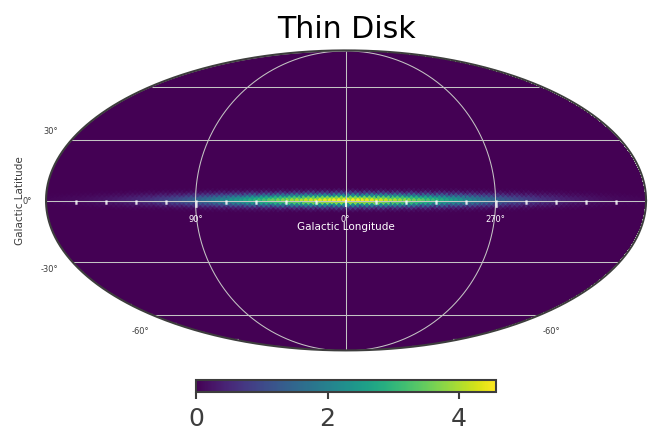

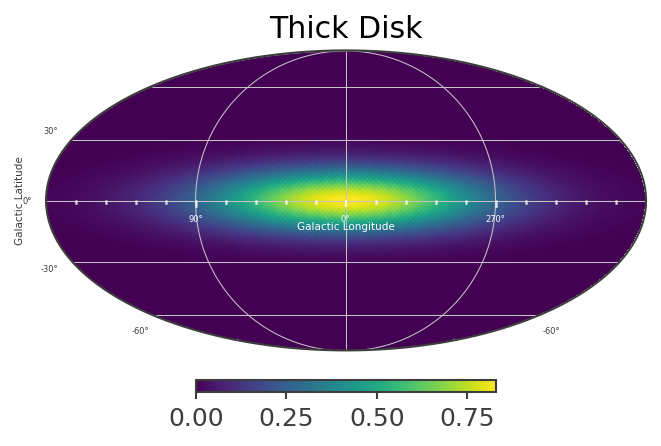

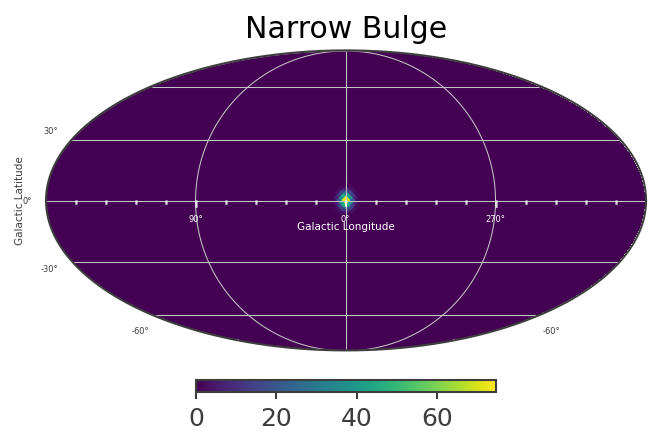

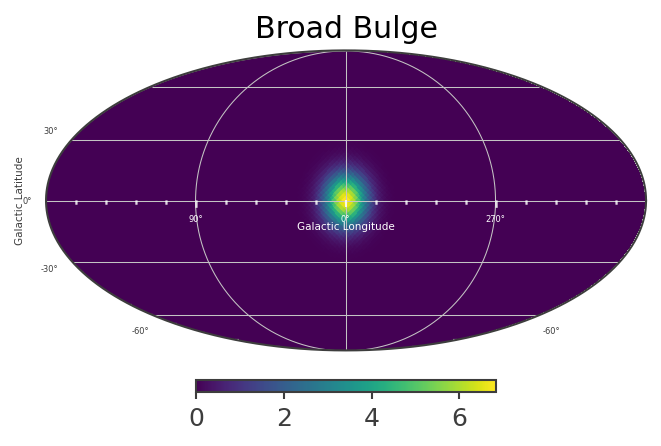

In [13]:
def set_up_grid(ax):
    ax.grid();
    lon = ax.coords['glon']
    lat = ax.coords['glat']
    lon.set_axislabel('Galactic Longitude',color='white',fontsize=5)
    lat.set_axislabel('Galactic Latitude',fontsize=5)
    lon.display_minor_ticks(True)
    lat.display_minor_ticks(True)
    lon.set_ticks_visible(True)
    lon.set_ticklabel_visible(True)
    lon.set_ticks(color='white',alpha=0.6)
    lat.set_ticks(color='white',alpha=0.6)
    lon.set_ticklabel(color='white',fontsize=4)
    lat.set_ticklabel(fontsize=4)
    lat.set_ticks_visible(True)
    lat.set_ticklabel_visible(True)

plot, ax = mThinDisk.plot(ax_kw = {'coord':'G'})
set_up_grid(ax)
ax.set_title("Thin Disk");

plot, ax = mThickDisk.plot(ax_kw = {'coord':'G'})
set_up_grid(ax)
ax.set_title("Thick Disk");

plot, ax = mNarrowBulge.plot(ax_kw = {'coord':'G'})
set_up_grid(ax)
ax.set_title("Narrow Bulge");

plot, ax = mBroadBulge.plot(ax_kw = {'coord':'G'})
set_up_grid(ax)
ax.set_title("Broad Bulge");


Note: should implement a multi-order coverage map in MHealpy to avoid all the unnnecesary pixelization in basically blank sky. 